<a href="https://colab.research.google.com/github/manthanjani/Heart_Attack_Prediction/blob/main/Heart_Attack_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Attack Analysis & Prediction


The heart is a powerful pump that pumps blood throughout the body 60-80 times per minute at rest.
While meeting the blood needs of the whole body, it also needs to be fed and taken blood.
These vessels that feed the heart itself are called coronary arteries.
Coronary insufficiency occurs when there is a disruption in the circulation of the coronary arteries.
The cases of coronary insufficiency vary according to the type, degree and location of the stenosis in the coronary vessels.
While some patients may have chest pain that occurs only during physical activity and is relieved by rest, sometimes a heart attack may occur as a result of sudden occlusion of the vessels, starting with severe chest pain and leading to sudden death.

#### Variable definitions in the Dataset

###### Age: Age of the patient 
###### Sex: Sex of the patient
###### exang: exercise induced angina (1 = yes; 0 = no)
###### ca: number of major vessels (0-3)
######cp: Chest Pain type chest pain type
######Value 1: typical angina
######Value 2: atypical angina
######Value 3: non-anginal pain
######Value 4: asymptomatic
######trtbps: resting blood pressure (in mm Hg)
######chol: cholestoral in mg/dl fetched via BMI sensor
######fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
######_restecg: resting electrocardiographic results
######Value 0: normal
######Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
######Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
######thalach: maximum heart rate achieved
######target: 0= less chance of heart attack 1= more chance of heart attack

## Importing the dataset

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [ ]:
dataset = pd.read_csv('heart.csv')

In [ ]:
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


## Missing Values

In [ ]:
dataset.isnull()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
isnull_number = []
for i in dataset.columns:
  x = dataset[i].isnull().sum() # returns the sum of null characters which is zero in the output so means no missing values
  isnull_number.append(x)

pd.DataFrame(isnull_number ,index = dataset.columns ,columns = ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


## Examining Unique Values

In [ ]:
dataset["thall"].value_counts().count()

4

In [ ]:
unique_number = []
for i in dataset.columns:
  x = dataset[i].value_counts().count()
  unique_number.append(x)

pd.DataFrame(unique_number ,index = dataset.columns ,columns = ["Unique Values"])

,Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


## Separating the numeric and categorical values

In [ ]:
categorical_var = ["sex" ,"cp" ,"fbs" ,"restecg" ,"exng" ,"slp" ,"caa" ,"thall" ,"output"]
numeric_var = ["age" ,"trtbps" ,"chol" ,"thalachh" ,"oldpeak"]

## Examining Statistical Data

In [ ]:
dataset[numeric_var].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


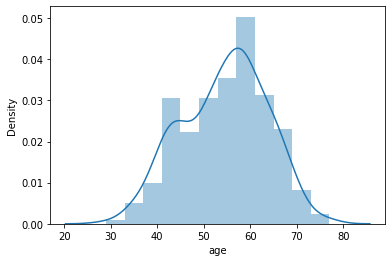

In [ ]:
sns.distplot(dataset["age"])

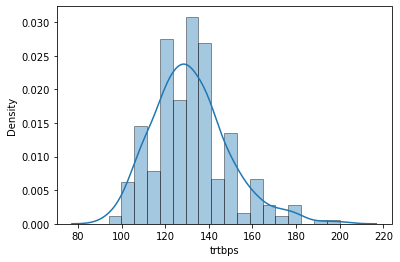

In [ ]:
sns.distplot(dataset['trtbps'], hist_kws = dict(linewidth = 1, edgecolor = "k") )

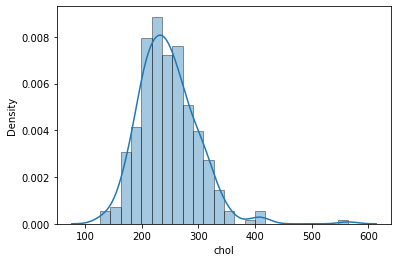

In [ ]:
sns.distplot(dataset["chol"], hist_kws = dict(linewidth = 1, edgecolor = "k"))

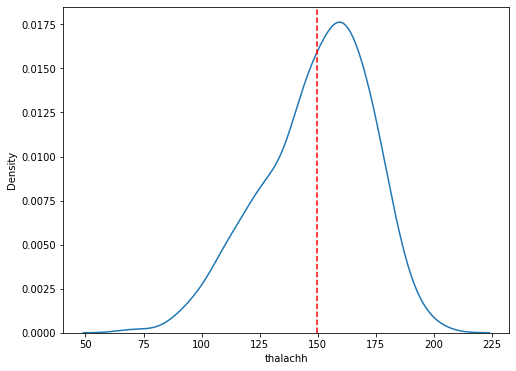

In [ ]:
x, y = plt.subplots(figsize=(8,6))
sns.distplot(dataset["thalachh"], hist = False, ax = y)
y.axvline(dataset["thalachh"].mean(),color="r",ls="--")

# Univariate Analysis

## Examining Numeric Variables

In [ ]:
numeric_var

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [ ]:
numeric_axis_name = ["age of the patient" ,"Resting Blood Pressure" ,"Cholestrol" ,"Maximum Heart Rate Achieved" ,"ST Depression"]

In [ ]:
list(zip(numeric_var ,numeric_axis_name))

[('age', 'age of the patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholestrol'),
 ('thalachh', 'Maximum Heart Rate Achieved'),
 ('oldpeak', 'ST Depression')]

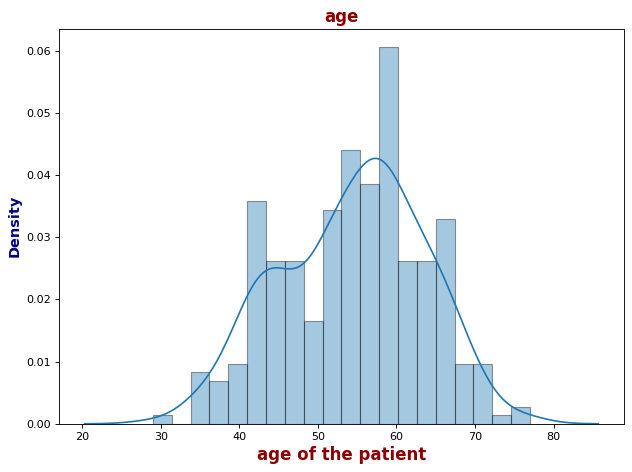

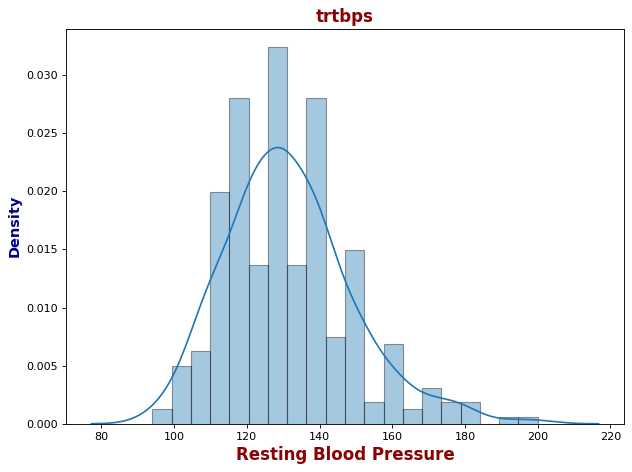

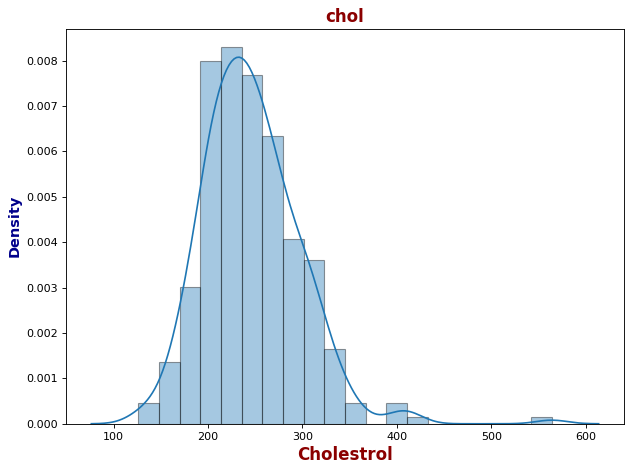

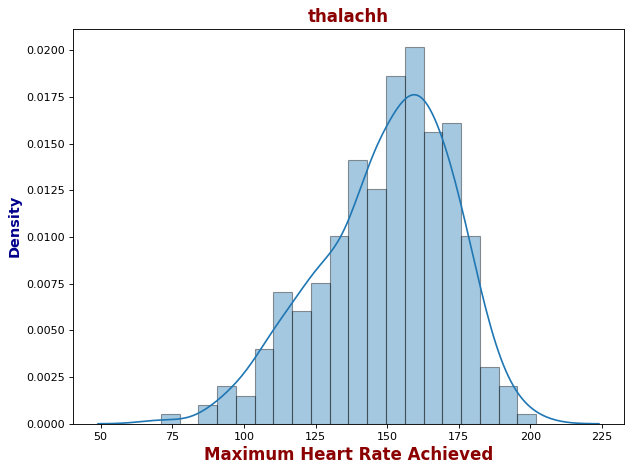

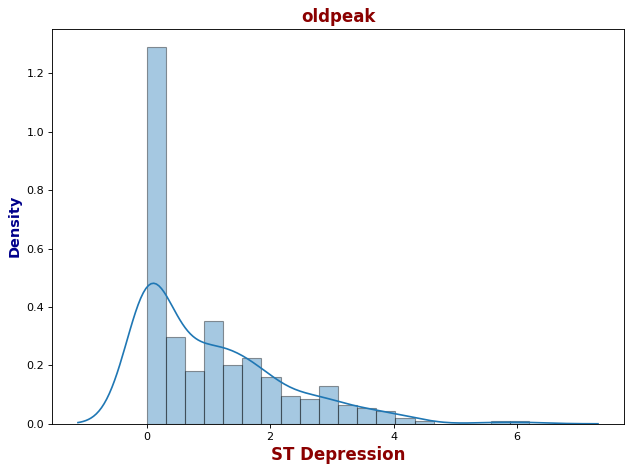

In [ ]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i,z in list(zip(numeric_var ,numeric_axis_name)):
  plt.figure(figsize=(8,6) ,dpi=80)
  sns.distplot(dataset[i] ,hist_kws=dict(linewidth=1 ,edgecolor="k") ,bins=20)

  plt.title(i ,fontdict = title_font)
  plt.xlabel(z ,fontdict = title_font)
  plt.ylabel("Density" ,fontdict = axis_font)

  plt.tight_layout()
  plt.show()




## Examining Categorical Variable

In [ ]:
categorical_var

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [ ]:
categorical_axis_name = ["Gender" , "Chest Pain" , "Fasting Blood Sugar" ,"Resting Electrocardiographic Results" ,"Excersice Induced Angina" 
                         , "The slope of ST Segment" , "Number of Majot Vessels" , "Thal" , "Target"]

In [ ]:
list(zip(categorical_var ,categorical_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain'),
 ('fbs', 'Fasting Blood Sugar'),
 ('restecg', 'Resting Electrocardiographic Results'),
 ('exng', 'Excersice Induced Angina'),
 ('slp', 'The slope of ST Segment'),
 ('caa', 'Number of Majot Vessels'),
 ('thall', 'Thal'),
 ('output', 'Target')]

In [ ]:
dataset["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

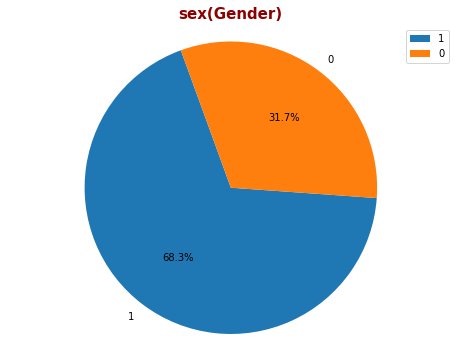

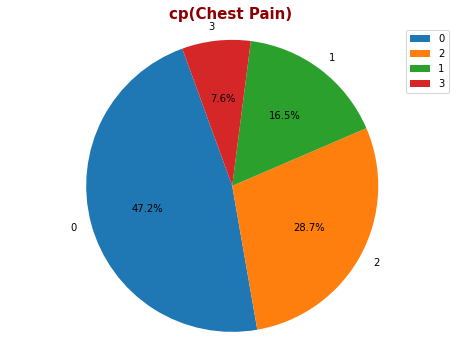

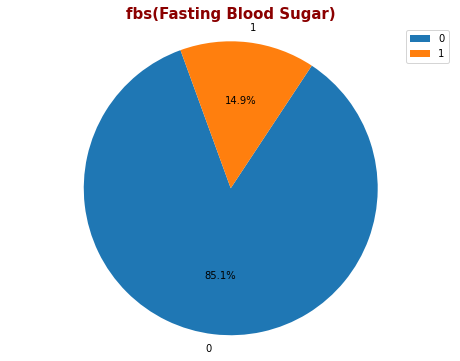

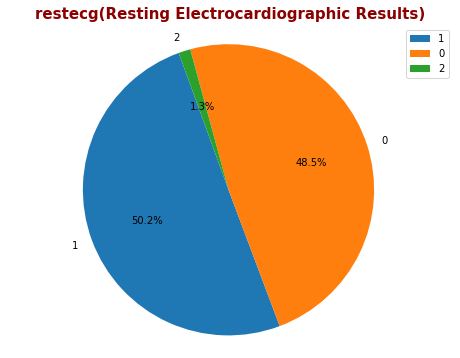

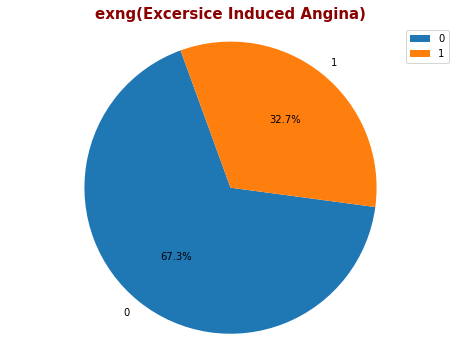

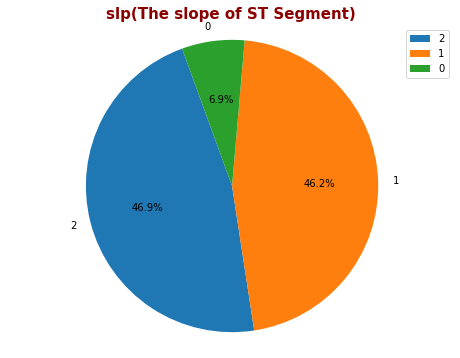

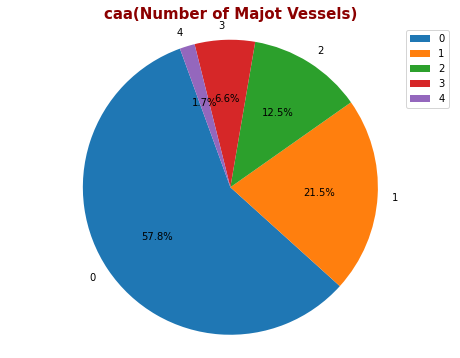

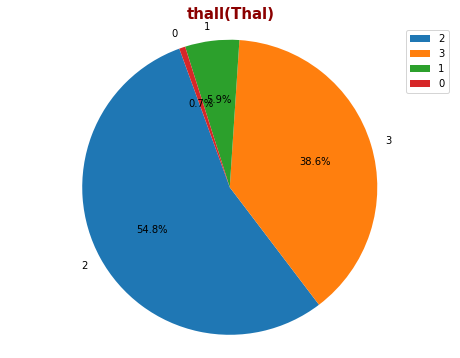

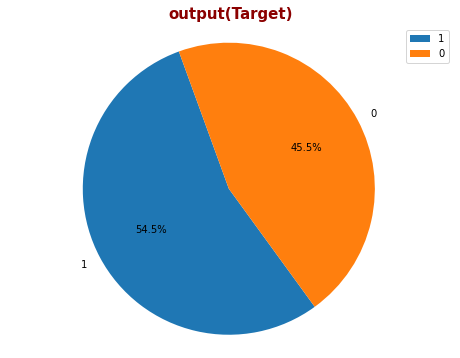

In [ ]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i , z in list(zip(categorical_var ,categorical_axis_name)):
  fig , ax = plt.subplots(figsize = (8,6))
  observation_values = list(dataset[i].value_counts().index)
  total_observation_values = list(dataset[i].value_counts())
                                                                                        # angle of start, rotates counterclockwise from x axis
  ax.pie(total_observation_values , labels = observation_values , autopct = '%1.1f%%' , startangle = 110 , labeldistance = 1.1 )
  ax.axis("equal")                                                # precision can be maintained

  plt.title((i +"(" + z + ")") , fontdict = title_font)
  plt.legend()
  plt.show


In [ ]:
dataset[dataset['thall']==0]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [ ]:
dataset['thall'] = dataset['thall'].replace(0 , np.nan)

In [ ]:
dataset.loc[[48,281] , :]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128,216,0,0,115,0,0.0,2,0,NaN,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,NaN,0


In [ ]:
isnull_number = []
for i in dataset.columns:
  x = dataset[i].isnull().sum() # returns the sum of null characters which is zero in the output so means no missing values
  isnull_number.append(x)

pd.DataFrame(isnull_number ,index = dataset.columns ,columns = ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [ ]:
dataset["thall"].value_counts()

2.0    166
3.0    117
1.0     18
Name: thall, dtype: int64

In [ ]:
dataset['thall'].fillna(2 , inplace = True)


In [ ]:
dataset.loc[[48,281] , :]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2.0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2.0,0


In [ ]:
dataset["thall"] = pd.to_numeric(dataset["thall"], downcast = "integer")
dataset.loc[[48,281] , :]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2,0


## Exploratory Data Analysis(Bi-Variate)

## Analysis between Numeric and Targer Variable

In [ ]:
numeric_var.append('output')

In [ ]:
numeric_var

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']

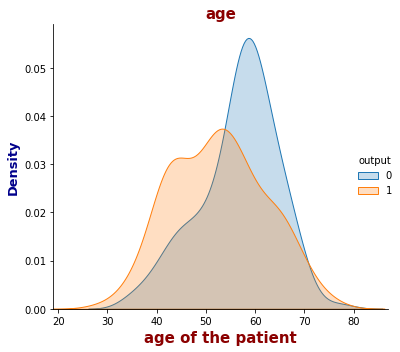

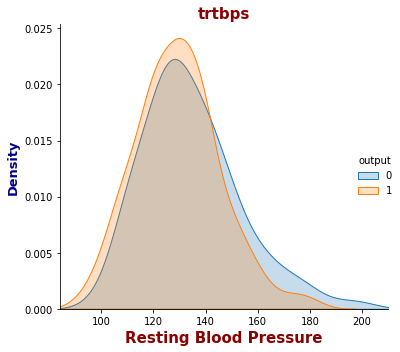

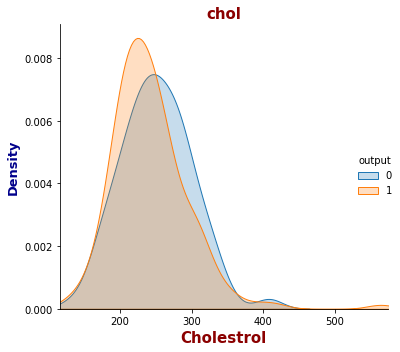

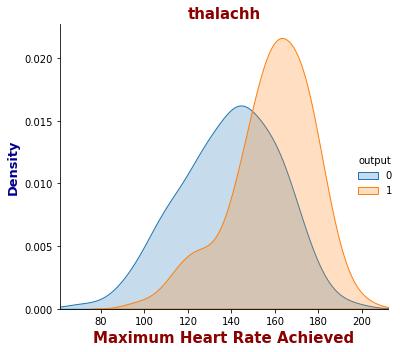

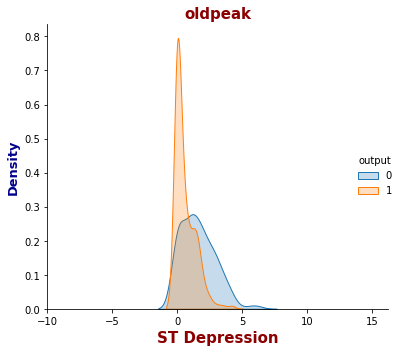

In [ ]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i,z in list(zip(numeric_var ,numeric_axis_name)):
  graph = sns.FacetGrid(dataset[numeric_var], hue='output', height=5, xlim = ((dataset[i].min() - 10),(dataset[i].max() + 10)))
  graph.map(sns.kdeplot, i, shade=True)
  graph.add_legend()

  plt.title(i ,fontdict = title_font)
  plt.xlabel(z ,fontdict = title_font)
  plt.ylabel("Density" ,fontdict = axis_font)

  plt.tight_layout()
  plt.show()


## Analysing between Categorical and Target Variable

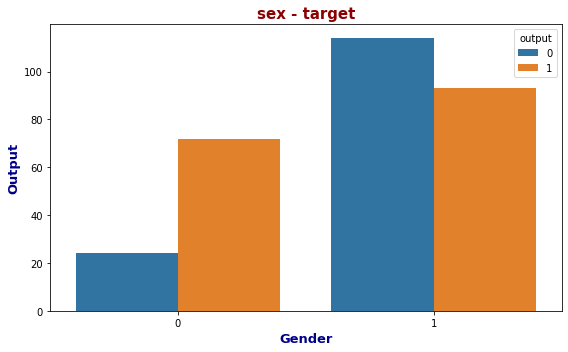

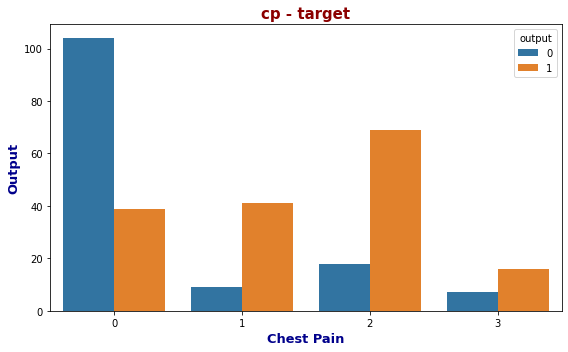

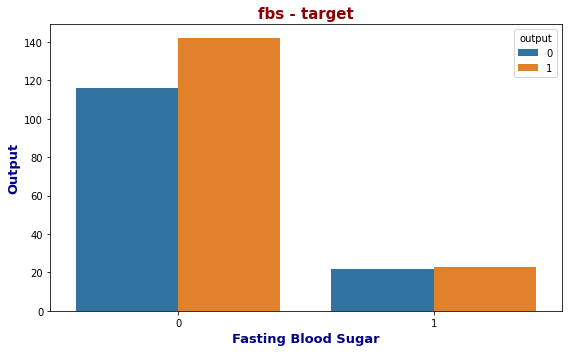

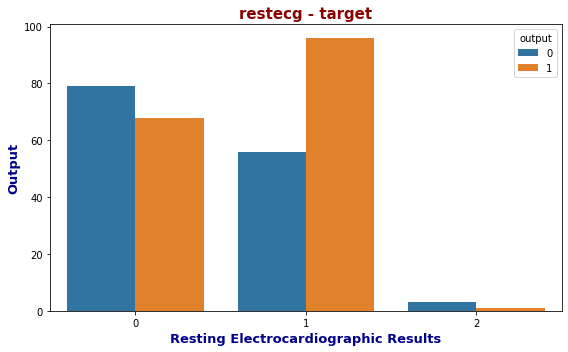

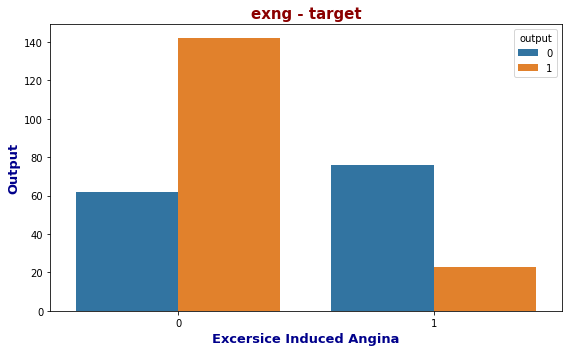

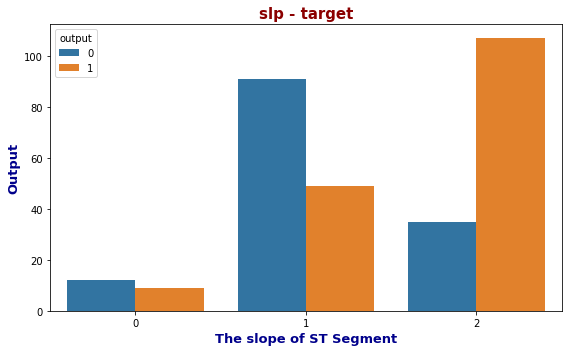

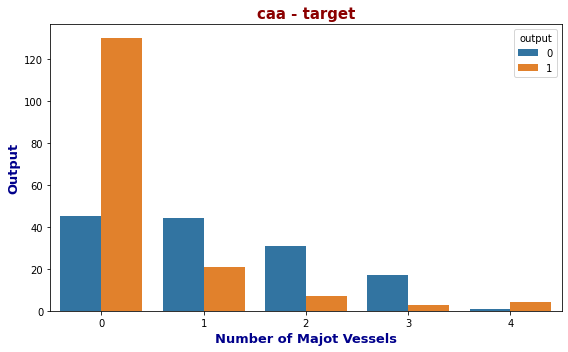

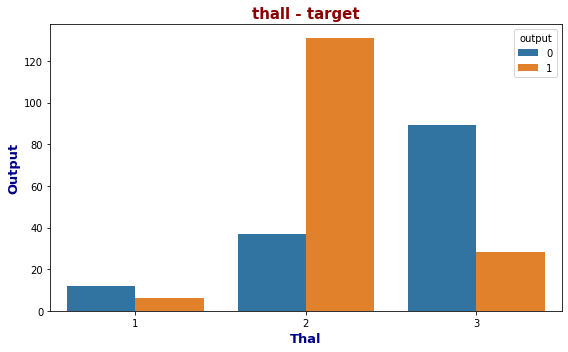

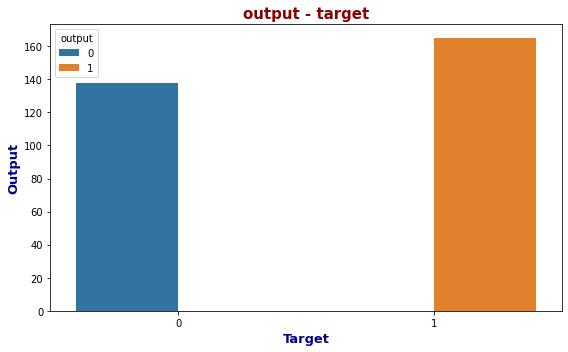

In [ ]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i,z in list(zip(categorical_var ,categorical_axis_name)):
  plt.figure(figsize= (8,5))
  sns.countplot(i ,data = dataset[categorical_var], hue= 'output')
  
  plt.title(i + ' - target' ,fontdict = title_font)
  plt.xlabel(z ,fontdict = axis_font)
  plt.ylabel("Output" ,fontdict = axis_font)

  plt.tight_layout()
  plt.show()


In [ ]:
numeric_var.remove('output')

## Examining Numeric variables among themselves

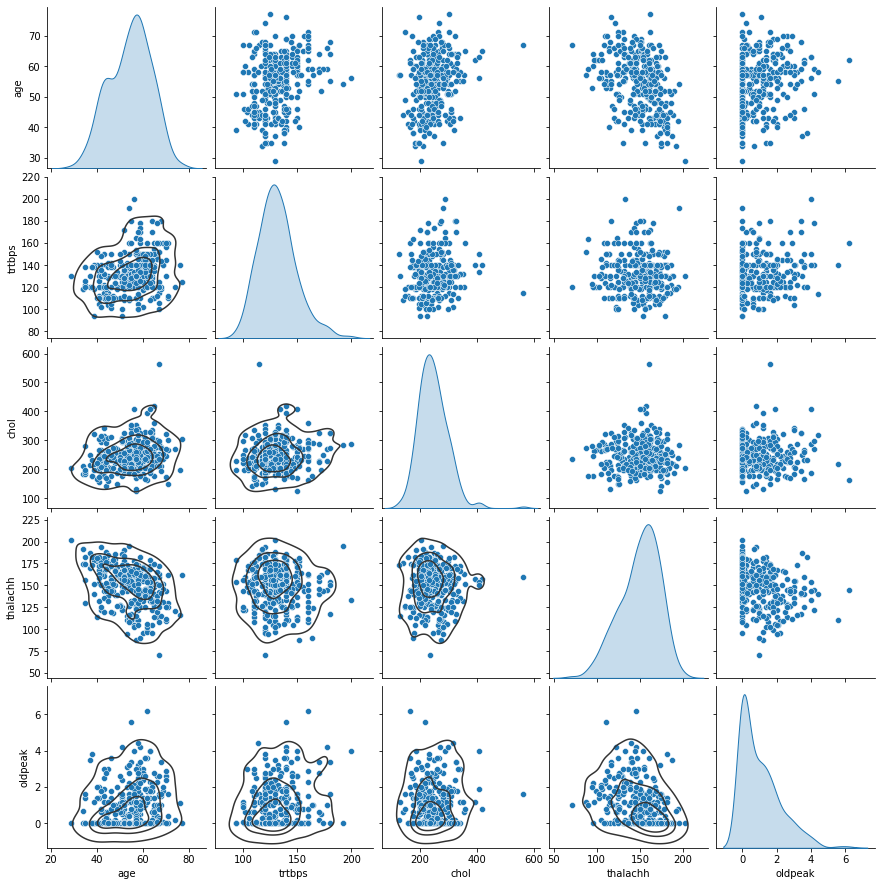

In [ ]:
graph = sns.pairplot(dataset[numeric_var], diag_kind = 'kde')
graph.map_lower(sns.kdeplot, levels = 4, color = '.2')
plt.show()

## Feature Scaling with RoubustScaler Method

In [ ]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
scaled_var = robust_scaler.fit_transform(dataset[numeric_var])

df_scaled = pd.DataFrame(scaled_var ,columns = numeric_var)
df_scaled.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250


## Creating a new dataframe with melt function

In [ ]:
df_new = pd.concat([df_scaled, dataset.loc[:, "output"]], axis = 1)
melted_data = pd.melt(df_new ,id_vars = "output" ,var_name = 'variables' ,value_name = 'value')
melted_data

,output,variables,value
0,1,age,0.592593
1,1,age,-1.333333
2,1,age,-1.037037
3,1,age,0.074074
4,1,age,0.148148
...,...,...,...
1510,0,oldpeak,-0.375000
1511,0,oldpeak,0.250000
1512,0,oldpeak,1.625000
1513,0,oldpeak,0.250000


## Examining Numerical and Categorical variables

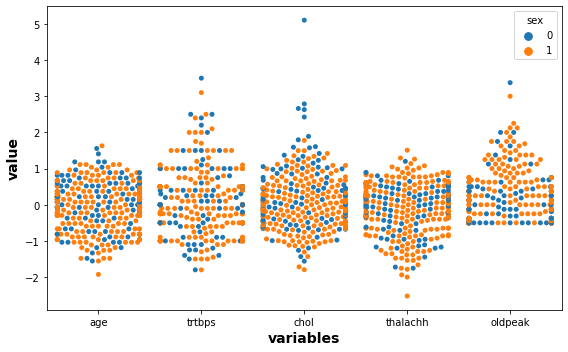

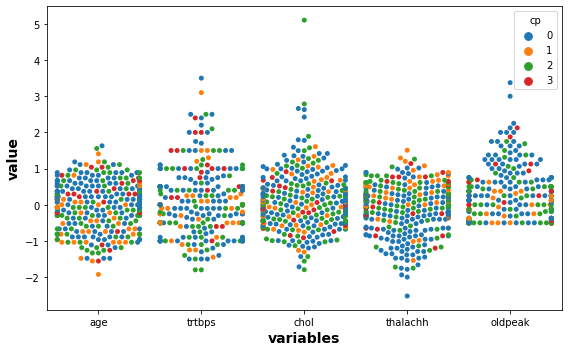

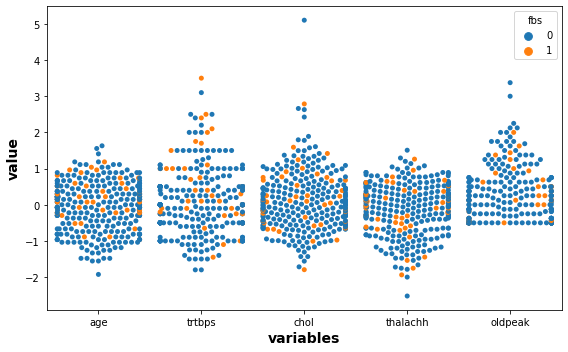

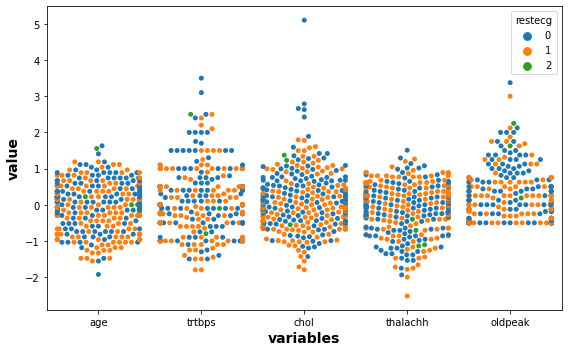

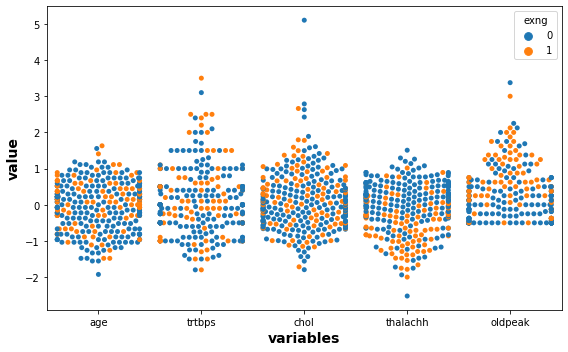

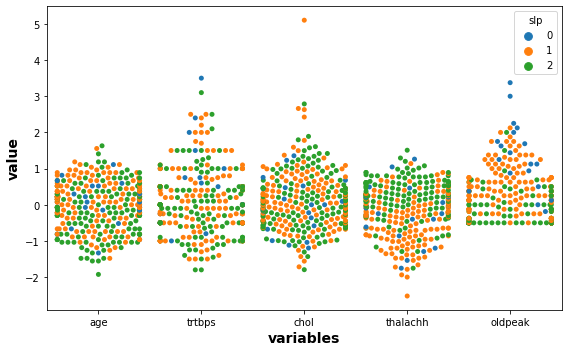

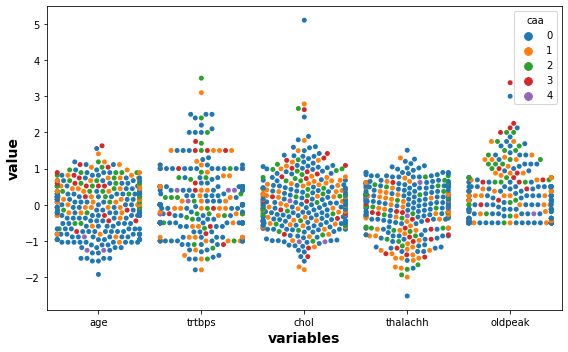

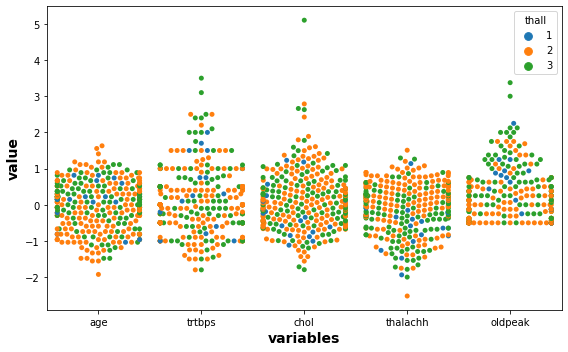

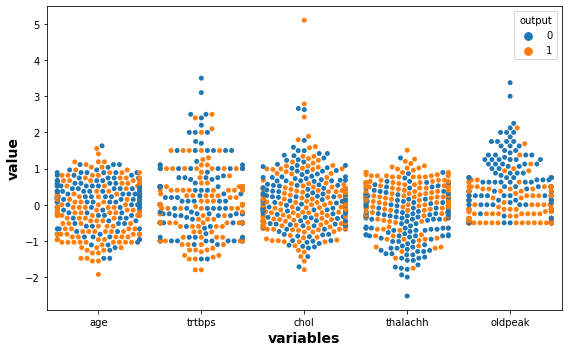

In [ ]:
axis_font = {"family" : "arial", "color" : "black", "weight" : "bold", "size" : 14}

for i in dataset[categorical_var]:
  df_new = pd.concat([df_scaled, dataset.loc[:, i]], axis = 1)
  melted_data = pd.melt(df_new ,id_vars = i ,var_name = 'variables' ,value_name = 'value')
  
  plt.figure(figsize = (8,5))
  sns.swarmplot(x = "variables", y= "value", hue = i, data = melted_data)
  plt.xlabel("variables", fontdict = axis_font)
  plt.ylabel("value", fontdict = axis_font)

  plt.tight_layout()
  plt.show()


## Heat Map analysis

In [ ]:
df_new2 = pd.concat([df_scaled, dataset[categorical_var]], axis = 1)

In [ ]:
df_new2.corr()

,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall,output
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.098447,-0.068653,0.121308,-0.116211,0.096801,-0.168814,0.276326,0.066745,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.056769,0.047608,0.177531,-0.114103,0.067616,-0.121475,0.101389,0.060638,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.197912,-0.076904,0.013294,-0.151040,0.067023,-0.004038,0.070511,0.087866,-0.085239
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.044020,0.295762,-0.008567,0.044123,-0.378812,0.386784,-0.213177,-0.115310,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,0.096093,-0.149230,0.005747,-0.058770,0.288223,-0.577537,0.222682,0.210236,-0.430696
sex,-0.098447,-0.056769,-0.197912,-0.044020,0.096093,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.068653,0.047608,-0.076904,0.295762,-0.149230,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.121308,0.177531,0.013294,-0.008567,0.005747,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
restecg,-0.116211,-0.114103,-0.151040,0.044123,-0.058770,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exng,0.096801,0.067616,0.067023,-0.378812,0.288223,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757


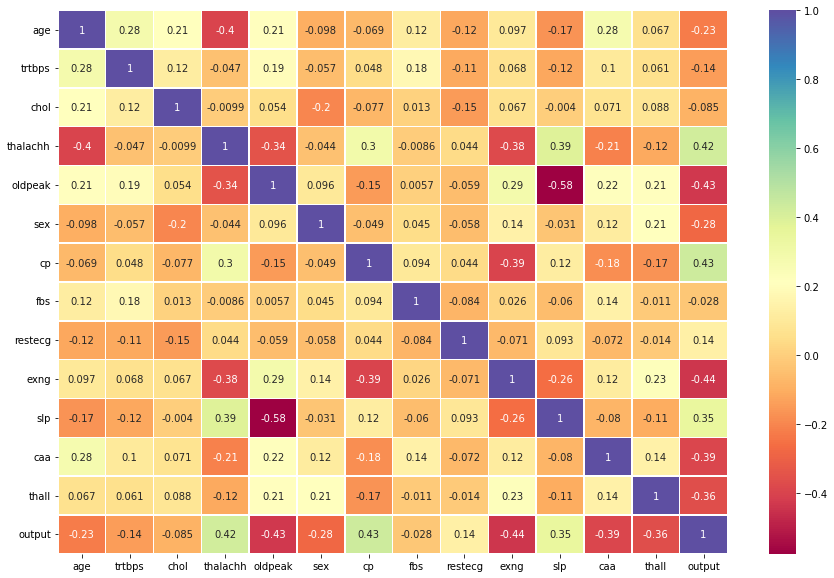

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df_new2.corr(), cmap = "Spectral", annot = True, linewidths = 0.5)

# Preparation for Modelling in Machine Learning

## Dropping Columns with low Correlation

In [ ]:
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.drop(["chol", "fbs", "restecg"], axis = 1, inplace = True)

dataset.head()

,age,sex,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,150,0,2.3,0,0,1,1
1,37,1,2,130,187,0,3.5,0,0,2,1
2,41,0,1,130,172,0,1.4,2,0,2,1
3,56,1,1,120,178,0,0.8,2,0,2,1
4,57,0,0,120,163,1,0.6,2,0,2,1


## Dealing with Outliers 

### TRTBPS Variable

In [ ]:

 from scipy import stats
 from scipy.stats import zscore
 from scipy.stats.mstats import winsorize 

In [ ]:
z_scores_trtbps = zscore(dataset["trtbps"])

for threshold in range(1,4):
  print("Treshold value: {}" ,format(threshold))
  print("Treshold value: {}" ,format(len(np.where(z_scores_trtbps > threshold)[0])))
  print("------------------")

Treshold value: {} 1
Treshold value: {} 51
------------------
Treshold value: {} 2
Treshold value: {} 13
------------------
Treshold value: {} 3
Treshold value: {} 2
------------------


In [ ]:
dataset[z_scores_trtbps > 2].trtbps.min()

170

In [ ]:
dataset[dataset["trtbps"] < 170].trtbps.max()

165

In [ ]:
dataset[dataset["trtbps"] < 170].trtbps.max()
winsorsize_pr_trtbps = (stats.percentileofscore(dataset["trtbps"], 165))/100
print(winsorsize_pr_trtbps)

0.957095709570957


In [ ]:

trtbps_winsorize = winsorize(dataset.trtbps, (1 - winsorsize_pr_trtbps))
dataset["trtbps_winsorize"] = trtbps_winsorize

dataset.head()


,age,sex,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output,trtbps_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145
1,37,1,2,130,187,0,3.5,0,0,2,1,130
2,41,0,1,130,172,0,1.4,2,0,2,1,130
3,56,1,1,120,178,0,0.8,2,0,2,1,120
4,57,0,0,120,163,1,0.6,2,0,2,1,120


### Thalach Variable

In [ ]:
def iqr(dataset, var):
  q1 = np.quantile(dataset[var], 0.25)
  q3 = np.quantile(dataset[var], 0.75)
  diff = q3 - q1
  lower_v = q1 - (1.5 + diff)
  upper_v = q3 + (1.5 + diff)
  return dataset[(dataset[var] < lower_v) | (dataset[var] > upper_v)]

thalach_out = iqr(dataset, "thalachh")
thalach_out
dataset.drop([272], axis = 0, inplace = True)

### Oldpeak Variable

In [ ]:
winsorize_percentile_op = (stats.percentileofscore(dataset["oldpeak"],4))/100
print(winsorize_percentile_op)

op_winsorize = winsorize(dataset.oldpeak, (0, (1-winsorize_percentile_op)))
dataset["oldpeak_winsorize"] = op_winsorize
dataset.head()
dataset.drop(["trtbps", "oldpeak"], axis = 1, inplace = True)
dataset.head()

0.9801324503311258


,age,sex,cp,thalachh,exng,slp,caa,thall,output,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,150,0,0,0,1,1,145,2.3
1,37,1,2,187,0,0,0,2,1,130,3.5
2,41,0,1,172,0,2,0,2,1,130,1.4
3,56,1,1,178,0,2,0,2,1,120,0.8
4,57,0,0,163,1,2,0,2,1,120,0.6


## Determining Distributions of Numeric Variables

In [ ]:
dataset[["age", "trtbps_winsorize", "thalachh", "oldpeak_winsorize"]].agg(["skew"]).transpose()\


,skew
age,-0.199209
trtbps_winsorize,0.373210
thalachh,-0.461611
oldpeak_winsorize,0.996036


In [ ]:
dataset["oldpeak_winsorize_log"] = np.log(dataset["oldpeak_winsorize"])
dataset["oldpeak_winsorize_sqrt"] = np.sqrt(dataset["oldpeak_winsorize"])
dataset[["oldpeak_winsorize", "oldpeak_winsorize_log", "oldpeak_winsorize_sqrt"]].agg(["skew"]).transpose()

,skew
oldpeak_winsorize,0.996036
oldpeak_winsorize_log,NaN
oldpeak_winsorize_sqrt,0.108926


In [ ]:
dataset.drop(["oldpeak_winsorize", "oldpeak_winsorize_log"], axis = 1, inplace = True)

## Applying One Hot Encoding to Categotical Data

In [ ]:
dataset_copy = dataset.copy()
categorical_var.remove("fbs")
categorical_var.remove("restecg")

dataset_copy = pd.get_dummies(dataset_copy, columns = categorical_var[:-1], drop_first = True)
dataset_copy.head()

,age,thalachh,output,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_2,thall_3
0,63,150,1,145,1.516575,1,0,0,1,0,0,0,0,0,0,0,0,0
1,37,187,1,130,1.870829,1,0,1,0,0,0,0,0,0,0,0,1,0
2,41,172,1,130,1.183216,0,1,0,0,0,0,1,0,0,0,0,1,0
3,56,178,1,120,0.894427,1,1,0,0,0,0,1,0,0,0,0,1,0
4,57,163,1,120,0.774597,0,0,0,0,1,0,1,0,0,0,0,1,0


## Feature Scaling for RobustScaler Method for Machine Learning

In [ ]:
new_numeric_var = ["age", "thalachh", "trtbps_winsorize", "oldpeak_winsorize_sqrt"]
robust_scaler = RobustScaler() 
dataset_copy[new_numeric_var] = robust_scaler.fit_transform(dataset_copy[new_numeric_var])
dataset_copy.head()

,age,thalachh,output,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_2,thall_3
0,0.581818,-0.095238,1,0.75,0.491851,1,0,0,1,0,0,0,0,0,0,0,0,0
1,-1.309091,1.079365,1,0.00,0.771913,1,0,1,0,0,0,0,0,0,0,0,1,0
2,-1.018182,0.603175,1,0.00,0.228308,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0.072727,0.793651,1,-0.50,0.000000,1,1,0,0,0,0,1,0,0,0,0,1,0
4,0.145455,0.317460,1,-0.50,-0.094734,0,0,0,0,1,0,1,0,0,0,0,1,0


## Separating Data into Test and Training Set

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset_copy.drop(["output"], axis = 1)
y = dataset_copy[["output"]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [ ]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 271
X_test: 31
y_train: 271
y_test: 31


# Modelling for Machine Learning

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()


log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy : {}", format(accuracy))

Test Accuracy : {} 0.8709677419354839


## Cross-Validation Scores

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8666666666666666


## Roc Curve

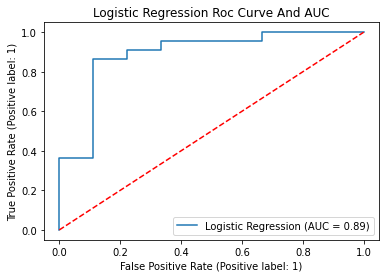

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_reg, X_test, y_test, name = "Logistic Regression")
plt.title("Logistic Regression Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

## Decision Tree Algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state = 5)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Acurracy : {}", format(accuracy))


Test Acurracy : {} 0.8387096774193549


## Cross-Validation Scores

In [ ]:
scores = cross_val_score(classifier, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8333333333333333


## Roc Curve

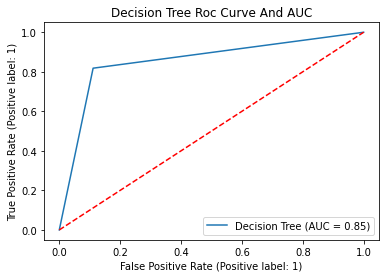

In [ ]:
plot_roc_curve(classifier, X_test, y_test, name = "Decision Tree")
plt.title("Decision Tree Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()


# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state = 5)

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("Test Accuracy of SVM is : {}", format(accuracy_score(y_test, y_pred)))


Test Accuracy of SVM is : {} 0.8709677419354839


## Cross-Validation Scores

In [ ]:

scores = cross_val_score(svc, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8333333333333334


## Roc Curve

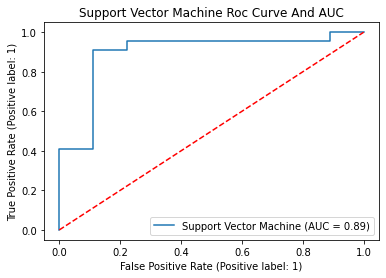

In [ ]:
plot_roc_curve(svc, X_test, y_test, name = "Support Vector Machine")
plt.title("Support Vector Machine Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

## Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 5)

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print("Acuuracy score of random forest is ", accuracy_score(y_test, y_pred))


Acuuracy score of random forest is  0.8387096774193549


## Cross Validation

In [ ]:
scores = cross_val_score(random_forest, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

Cross-Validation Accuracy Scores 0.8999999999999998


## Roc Curve

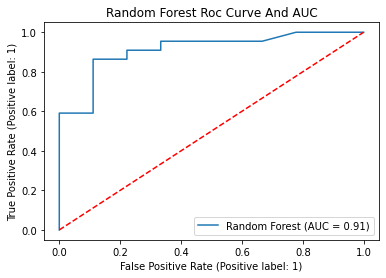

In [ ]:
plot_roc_curve(random_forest, X_test, y_test, name = "Random Forest")
plt.title("Random Forest Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

### Conclusion

Within the scope of the project, we first made the data set ready for Exploratory Data Analysis(EDA)
We performed Exploratory Data Analysis(EDA).
We analyzed numerical and categorical variables within the scope of univariate analysis by using Distplot and Pie Chart graphics.
Within the scope of bivariate analysis, we analyzed the variables among each other using FacetGrid, Count Plot, Pair Plot, Swarm plot.
We made the data set ready for the model. In this context, we struggled with missing and outlier values.
We used four different algorithms in the model phase.
We got 87% accuracy with the Logistic Regression model.
We got 83% accuracy with the Decision Tree Model.
We got 83% accuracy with the Support Vector Classifier Model.
We got 89% accuracy with the Random Forest Model
When all these model outputs are evaluated, we prefer the model we created with the Random Forest, which gives the best results.